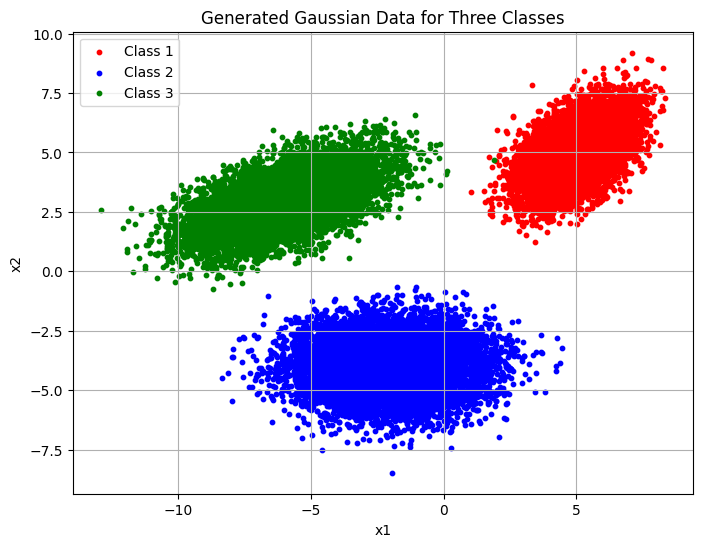

Two-Class Classification Errors: 0 out of 4000
Three-Class Classification Errors: 2 out of 6000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Exercise 1: Linear Classification
# Data generation from Gaussian distributions
np.random.seed(42)
L = int(1e4)  # Number of samples per class

# Means and covariance matrices for three classes
mu_1, sigma_1 = [5, 5], [[1, 0.5], [0.5, 1]]
mu_2, sigma_2 = [-2, -4], [[3, 0], [0, 1]]
mu_3, sigma_3 = [-6, 3], [[3, 1], [1, 1]]

# Sampling from Gaussian distributions
X_1 = np.random.multivariate_normal(mu_1, sigma_1, L)
X_2 = np.random.multivariate_normal(mu_2, sigma_2, L)
X_3 = np.random.multivariate_normal(mu_3, sigma_3, L)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', s=10, label='Class 1')
plt.scatter(X_2[:, 0], X_2[:, 1], color='blue', s=10, label='Class 2')
plt.scatter(X_3[:, 0], X_3[:, 1], color='green', s=10, label='Class 3')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.title("Generated Gaussian Data for Three Classes")
plt.show()

# Two-class classification setup (Class 1 and Class 2)
labels_1 = np.zeros((L, 2))
labels_1[:, 1] = 1  # Class 1 labeled as [0, 1]
labels_2 = np.zeros((L, 2))
labels_2[:, 0] = 1  # Class 2 labeled as [1, 0]

data_2class = np.vstack((np.hstack((X_1, labels_1)), np.hstack((X_2, labels_2))))
np.random.shuffle(data_2class)  # Randomize dataset

# Train-test split
X = data_2class[:, :2]
y = data_2class[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Least squares classification
X_train_augmented = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
W = np.linalg.pinv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train

# Perform classification on test data
X_test_augmented = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
y_pred = np.argmax(X_test_augmented @ W, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Count classification errors
errors = np.sum(y_pred != y_test_labels)
print(f"Two-Class Classification Errors: {errors} out of {len(y_test_labels)}")

# Three-class classification setup
labels_3_1 = np.array([[1, 0, 0]] * L)  # Class 1 labeled as [1, 0, 0]
labels_3_2 = np.array([[0, 1, 0]] * L)  # Class 2 labeled as [0, 1, 0]
labels_3_3 = np.array([[0, 0, 1]] * L)  # Class 3 labeled as [0, 0, 1]

data_3class = np.vstack((np.hstack((X_1, labels_3_1)),
                         np.hstack((X_2, labels_3_2)),
                         np.hstack((X_3, labels_3_3))))
np.random.shuffle(data_3class)

# Train-test split for three-class classification
X = data_3class[:, :2]
y = data_3class[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Least squares for three-class classification
X_train_augmented = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
W = np.linalg.pinv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train

# Perform classification on test data
X_test_augmented = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
y_pred = np.argmax(X_test_augmented @ W, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Count classification errors
errors = np.sum(y_pred != y_test_labels)
print(f"Three-Class Classification Errors: {errors} out of {len(y_test_labels)}")


In [2]:
# Exercise 2: Perceptron for Two-Class Classification
def perceptron_train(X, y, learning_rate=0.01, epochs=100):
    weights = np.zeros(X.shape[1])
    bias = 0
    for _ in range(epochs):
        for xi, target in zip(X, y):
            update = learning_rate * (target - predict(xi, weights, bias))
            weights += update * xi
            bias += update
    return weights, bias

def predict(x, weights, bias):
    return 1 if np.dot(x, weights) + bias >= 0 else 0

# Prepare data for perceptron (Class 1 vs Class 2)
X = data_2class[:, :2]
y = np.argmax(data_2class[:, 2:], axis=1)  # Convert one-hot to single labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train perceptron
weights, bias = perceptron_train(X_train, y_train, learning_rate=0.01, epochs=100)

# Evaluate perceptron
y_pred = [predict(x, weights, bias) for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy: {accuracy * 100:.2f}%")

Perceptron Accuracy: 100.00%


In [3]:
# Exercise 3: Logistic Regression for Two-Class Classification
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_train(X, y, learning_rate=0.1, epochs=100):
    weights = np.zeros(X.shape[1])
    bias = 0
    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        predictions = sigmoid(linear_model)
        gradient_weights = np.dot(X.T, (predictions - y)) / len(y)
        gradient_bias = np.sum(predictions - y) / len(y)
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
    return weights, bias

# Prepare data for logistic regression
X = data_2class[:, :2]
y = np.argmax(data_2class[:, 2:], axis=1)  # Convert one-hot to single labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.1, epochs=100)

# Evaluate logistic regression
y_pred = [1 if sigmoid(np.dot(x, weights) + bias) >= 0.5 else 0 for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 100.00%


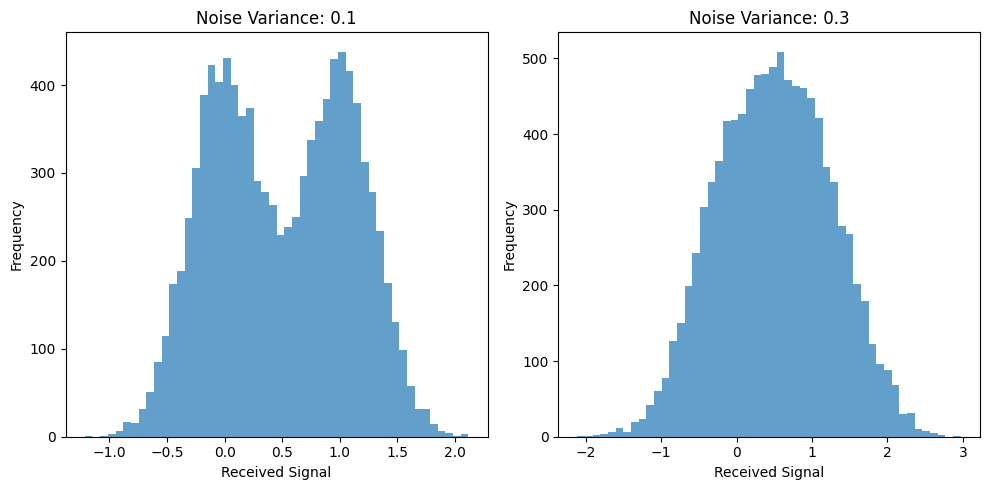

Logistic Regression Accuracy for Noisy Channel: 91.45%


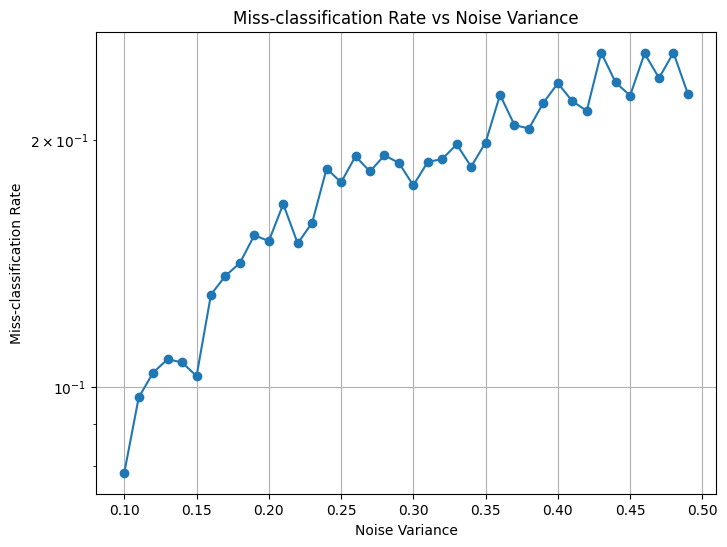

In [4]:
# Exercise 4: Logistic Regression for Noisy Channel Data
# Simulate noisy channel data
np.random.seed(42)
L = int(1e4)
original_bits = np.random.randint(0, 2, L)
noise_variances = [0.1, 0.3]

# Plot histograms for different noise variances
plt.figure(figsize=(10, 5))
for i, sigma_n in enumerate(noise_variances):
    noise = np.random.normal(0, np.sqrt(sigma_n), L)
    received_signal = original_bits + noise
    plt.subplot(1, 2, i + 1)
    plt.hist(received_signal, bins=50, alpha=0.7)
    plt.title(f"Noise Variance: {sigma_n}")
    plt.xlabel("Received Signal")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Train logistic regression on noisy data
sigma_n = 0.1
noise = np.random.normal(0, np.sqrt(sigma_n), L)
received_signal = original_bits + noise

# Prepare dataset
X = received_signal.reshape(-1, 1)
y = original_bits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.1, epochs=100)

# Evaluate logistic regression
y_pred = [1 if sigmoid(np.dot(x, weights) + bias) >= 0.5 else 0 for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy for Noisy Channel: {accuracy * 100:.2f}%")

# Miss-classification rate for varying noise variances
miss_classification_rates = []
noise_variances = np.arange(0.1, 0.5, 0.01)
for sigma_n in noise_variances:
    noise = np.random.normal(0, np.sqrt(sigma_n), L)
    received_signal = original_bits + noise
    X = received_signal.reshape(-1, 1)
    y = original_bits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.1, epochs=100)
    y_pred = [1 if sigmoid(np.dot(x, weights) + bias) >= 0.5 else 0 for x in X_test]
    miss_classification_rate = 1 - accuracy_score(y_test, y_pred)
    miss_classification_rates.append(miss_classification_rate)

# Plot miss-classification rate
plt.figure(figsize=(8, 6))
plt.plot(noise_variances, miss_classification_rates, marker='o')
plt.yscale('log')
plt.xlabel("Noise Variance")
plt.ylabel("Miss-classification Rate")
plt.title("Miss-classification Rate vs Noise Variance")
plt.grid()
plt.show()

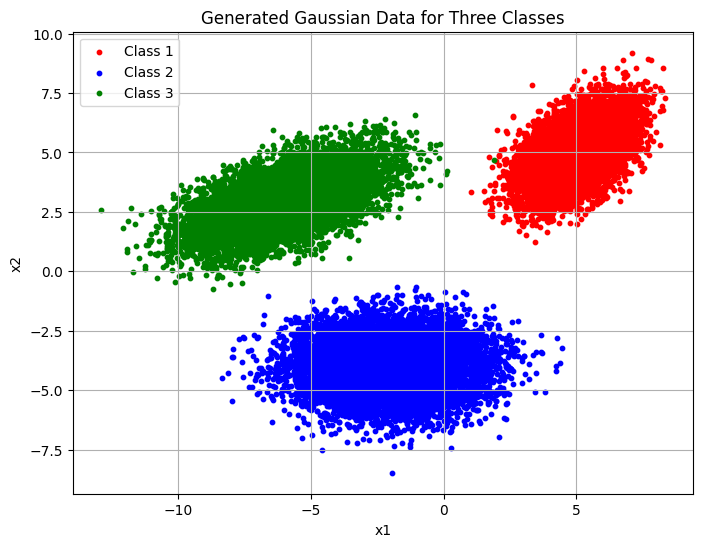

Two-Class Classification Errors: 0 out of 4000
Three-Class Classification Errors: 2 out of 6000
Perceptron Accuracy: 100.00%
Logistic Regression Accuracy: 100.00%


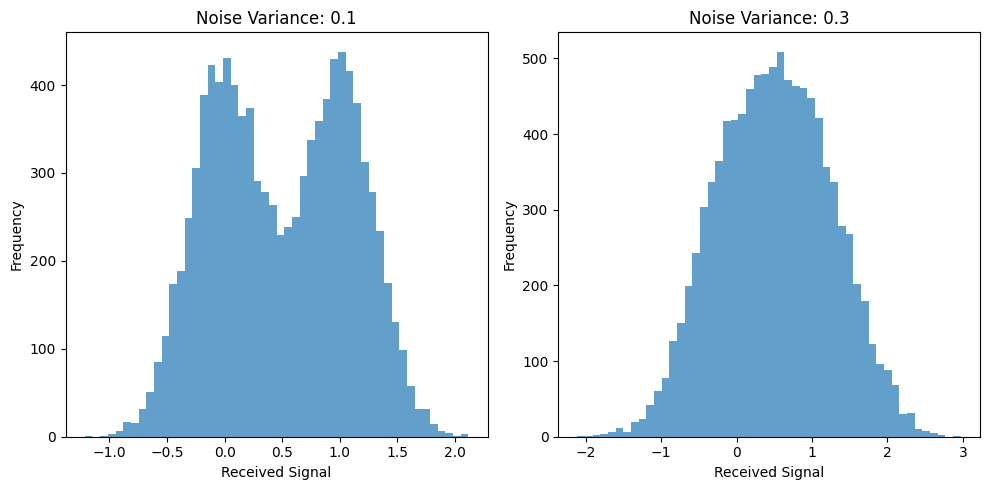

Logistic Regression Accuracy for Noisy Channel: 91.45%


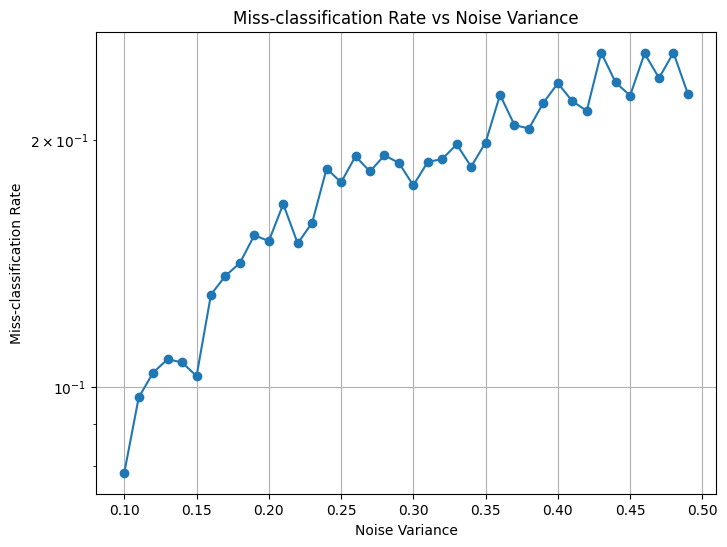

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Exercise 1: Linear Classification
# Data generation from Gaussian distributions
np.random.seed(42)
L = int(1e4)  # Number of samples per class

# Means and covariance matrices for three classes
mu_1, sigma_1 = [5, 5], [[1, 0.5], [0.5, 1]]
mu_2, sigma_2 = [-2, -4], [[3, 0], [0, 1]]
mu_3, sigma_3 = [-6, 3], [[3, 1], [1, 1]]

# Sampling from Gaussian distributions
X_1 = np.random.multivariate_normal(mu_1, sigma_1, L)
X_2 = np.random.multivariate_normal(mu_2, sigma_2, L)
X_3 = np.random.multivariate_normal(mu_3, sigma_3, L)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', s=10, label='Class 1')
plt.scatter(X_2[:, 0], X_2[:, 1], color='blue', s=10, label='Class 2')
plt.scatter(X_3[:, 0], X_3[:, 1], color='green', s=10, label='Class 3')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.title("Generated Gaussian Data for Three Classes")
plt.show()

# Two-class classification setup (Class 1 and Class 2)
labels_1 = np.zeros((L, 2))
labels_1[:, 1] = 1  # Class 1 labeled as [0, 1]
labels_2 = np.zeros((L, 2))
labels_2[:, 0] = 1  # Class 2 labeled as [1, 0]

data_2class = np.vstack((np.hstack((X_1, labels_1)), np.hstack((X_2, labels_2))))
np.random.shuffle(data_2class)  # Randomize dataset

# Train-test split
X = data_2class[:, :2]
y = data_2class[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Least squares classification
X_train_augmented = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
W = np.linalg.pinv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train

# Perform classification on test data
X_test_augmented = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
y_pred = np.argmax(X_test_augmented @ W, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Count classification errors
errors = np.sum(y_pred != y_test_labels)
print(f"Two-Class Classification Errors: {errors} out of {len(y_test_labels)}")

# Three-class classification setup
labels_3_1 = np.array([[1, 0, 0]] * L)  # Class 1 labeled as [1, 0, 0]
labels_3_2 = np.array([[0, 1, 0]] * L)  # Class 2 labeled as [0, 1, 0]
labels_3_3 = np.array([[0, 0, 1]] * L)  # Class 3 labeled as [0, 0, 1]

data_3class = np.vstack((np.hstack((X_1, labels_3_1)),
                         np.hstack((X_2, labels_3_2)),
                         np.hstack((X_3, labels_3_3))))
np.random.shuffle(data_3class)

# Train-test split for three-class classification
X = data_3class[:, :2]
y = data_3class[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Least squares for three-class classification
X_train_augmented = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
W = np.linalg.pinv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train

# Perform classification on test data
X_test_augmented = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
y_pred = np.argmax(X_test_augmented @ W, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Count classification errors
errors = np.sum(y_pred != y_test_labels)
print(f"Three-Class Classification Errors: {errors} out of {len(y_test_labels)}")

# Exercise 2: Perceptron for Two-Class Classification
def perceptron_train(X, y, learning_rate=0.01, epochs=100):
    weights = np.zeros(X.shape[1])
    bias = 0
    for _ in range(epochs):
        for xi, target in zip(X, y):
            update = learning_rate * (target - predict(xi, weights, bias))
            weights += update * xi
            bias += update
    return weights, bias

def predict(x, weights, bias):
    return 1 if np.dot(x, weights) + bias >= 0 else 0

# Prepare data for perceptron (Class 1 vs Class 2)
X = data_2class[:, :2]
y = np.argmax(data_2class[:, 2:], axis=1)  # Convert one-hot to single labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train perceptron
weights, bias = perceptron_train(X_train, y_train, learning_rate=0.01, epochs=100)

# Evaluate perceptron
y_pred = [predict(x, weights, bias) for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy: {accuracy * 100:.2f}%")

# Exercise 3: Logistic Regression for Two-Class Classification
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_train(X, y, learning_rate=0.1, epochs=100):
    weights = np.zeros(X.shape[1])
    bias = 0
    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        predictions = sigmoid(linear_model)
        gradient_weights = np.dot(X.T, (predictions - y)) / len(y)
        gradient_bias = np.sum(predictions - y) / len(y)
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
    return weights, bias

# Prepare data for logistic regression
X = data_2class[:, :2]
y = np.argmax(data_2class[:, 2:], axis=1)  # Convert one-hot to single labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.1, epochs=100)

# Evaluate logistic regression
y_pred = [1 if sigmoid(np.dot(x, weights) + bias) >= 0.5 else 0 for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

# Exercise 4: Logistic Regression for Noisy Channel Data
# Simulate noisy channel data
np.random.seed(42)
L = int(1e4)
original_bits = np.random.randint(0, 2, L)
noise_variances = [0.1, 0.3]

# Plot histograms for different noise variances
plt.figure(figsize=(10, 5))
for i, sigma_n in enumerate(noise_variances):
    noise = np.random.normal(0, np.sqrt(sigma_n), L)
    received_signal = original_bits + noise
    plt.subplot(1, 2, i + 1)
    plt.hist(received_signal, bins=50, alpha=0.7)
    plt.title(f"Noise Variance: {sigma_n}")
    plt.xlabel("Received Signal")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Train logistic regression on noisy data
sigma_n = 0.1
noise = np.random.normal(0, np.sqrt(sigma_n), L)
received_signal = original_bits + noise

# Prepare dataset
X = received_signal.reshape(-1, 1)
y = original_bits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.1, epochs=100)

# Evaluate logistic regression
y_pred = [1 if sigmoid(np.dot(x, weights) + bias) >= 0.5 else 0 for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy for Noisy Channel: {accuracy * 100:.2f}%")

# Miss-classification rate for varying noise variances
miss_classification_rates = []
noise_variances = np.arange(0.1, 0.5, 0.01)
for sigma_n in noise_variances:
    noise = np.random.normal(0, np.sqrt(sigma_n), L)
    received_signal = original_bits + noise
    X = received_signal.reshape(-1, 1)
    y = original_bits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.1, epochs=100)
    y_pred = [1 if sigmoid(np.dot(x, weights) + bias) >= 0.5 else 0 for x in X_test]
    miss_classification_rate = 1 - accuracy_score(y_test, y_pred)
    miss_classification_rates.append(miss_classification_rate)

# Plot miss-classification rate
plt.figure(figsize=(8, 6))
plt.plot(noise_variances, miss_classification_rates, marker='o')
plt.yscale('log')
plt.xlabel("Noise Variance")
plt.ylabel("Miss-classification Rate")
plt.title("Miss-classification Rate vs Noise Variance")
plt.grid()
plt.show()
